In [35]:
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("Churn_Modelling.csv")

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


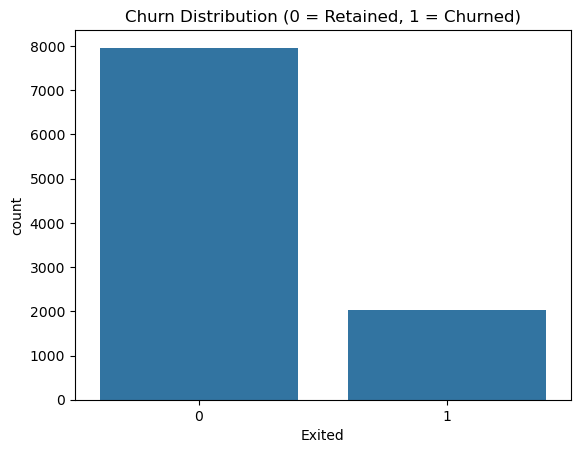

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Distribution
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution (0 = Retained, 1 = Churned)")
plt.show()

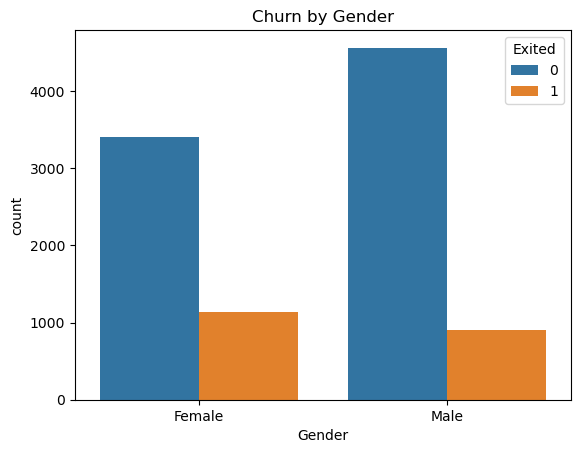

In [42]:
# Gender vs Churn
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Churn by Gender")
plt.show()

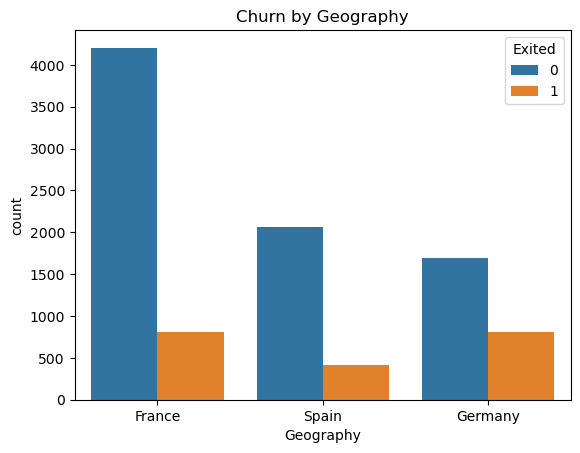

In [43]:
# Geography vs Churn
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Churn by Geography")
plt.show()

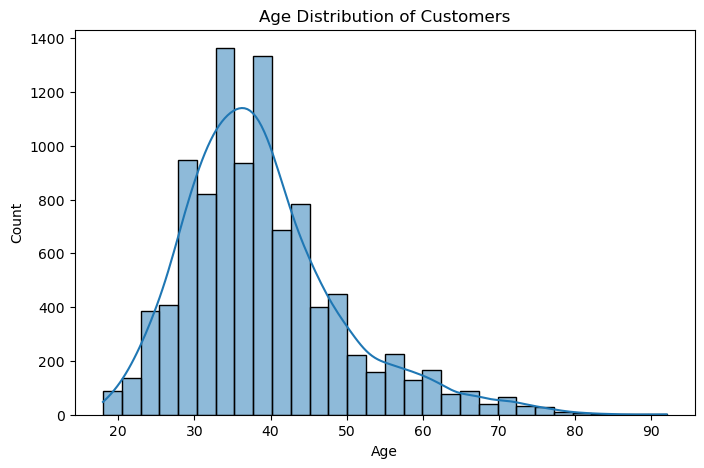

In [44]:
# Age Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.show()

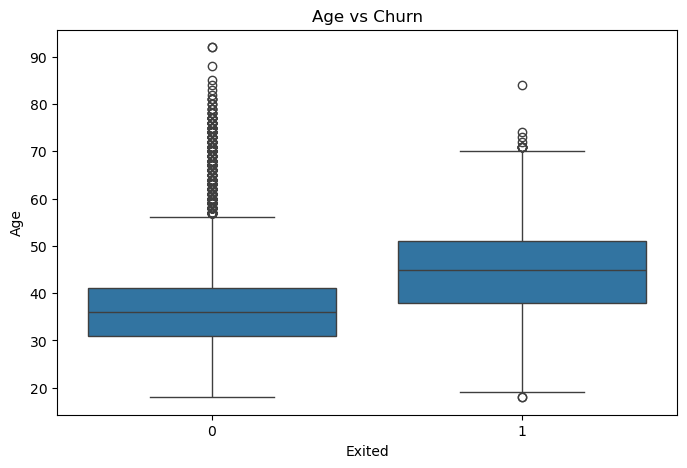

In [45]:
# Age vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Exited", y="Age", data=df)
plt.title("Age vs Churn")
plt.show()

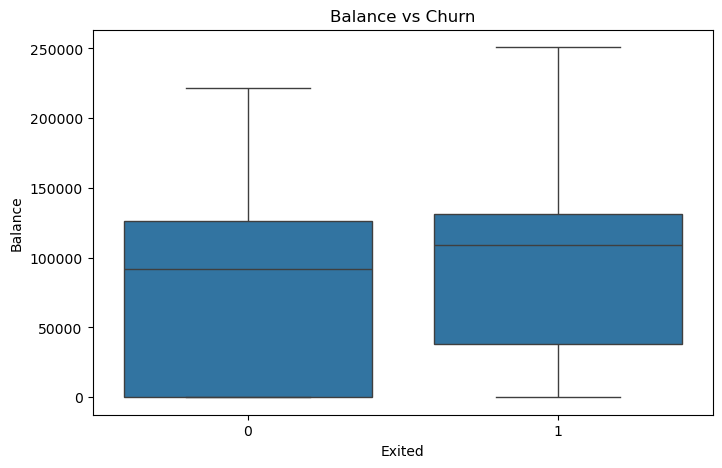

In [46]:
# Balance vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(x="Exited", y="Balance", data=df)
plt.title("Balance vs Churn")
plt.show()

In [47]:
print(df["Exited"].value_counts())

Exited
0    7963
1    2037
Name: count, dtype: int64


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [55]:
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

In [56]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1


In [57]:
df = pd.get_dummies(df, columns=["Geography"], drop_first = True)

In [58]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,False,False
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,False,False
9997,709,0,36,7,0.00,1,0,1,42085.58,1,False,False
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,True,False


In [61]:
X = df.drop("Exited", axis=1)
Y = df["Exited"]

In [62]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
log_reg = LogisticRegression(max_iter=300, class_weight="balanced")
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [67]:
rf = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


In [68]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\n--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


--- Logistic Regression ---
Accuracy: 0.7135
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1593
           1       0.39      0.70      0.50       407

    accuracy                           0.71      2000
   macro avg       0.65      0.71      0.65      2000
weighted avg       0.80      0.71      0.74      2000



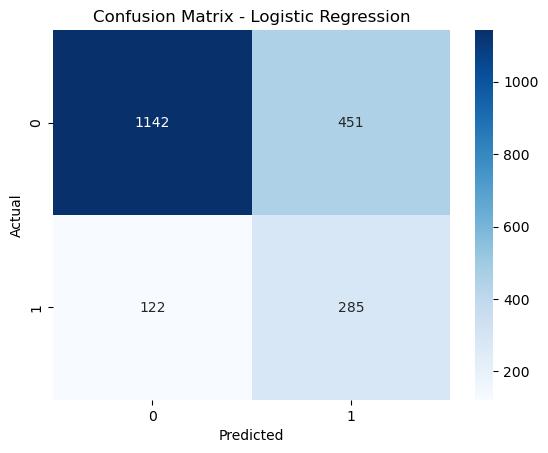


--- Random Forest ---
Accuracy: 0.8625
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



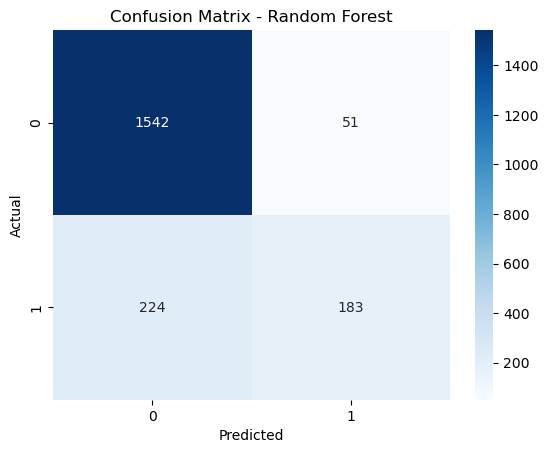


--- Gradient Boosting ---
Accuracy: 0.867
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.77      0.50      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000



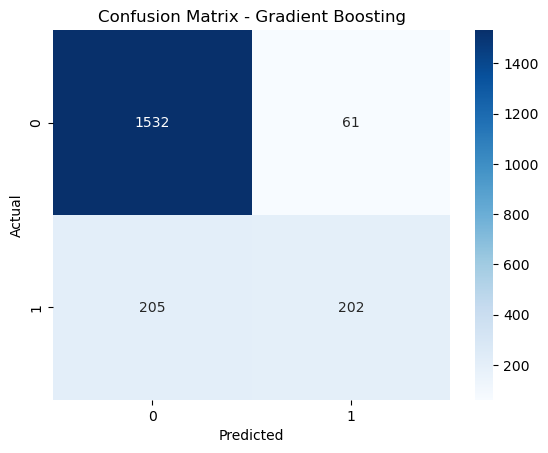

In [69]:
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

In [70]:
# Sample customer
sample = {
    "CreditScore": 600,
    "Gender": 1,   # Male=1, Female=0 (LabelEncoded)
    "Age": 40,
    "Tenure": 3,
    "Balance": 60000,
    "NumOfProducts": 2,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": 50000,
    "Geography_Germany": 0,
    "Geography_Spain": 0   # France is baseline (both 0)
}


In [71]:
# Convert to DataFrame
sample_df = pd.DataFrame([sample])

# Scale with the same scaler
sample_scaled = scaler.transform(sample_df)

In [72]:
print("Logistic Regression:", log_reg.predict(sample_scaled))
print("Random Forest:", rf.predict(sample_scaled))
print("Gradient Boosting:", gb.predict(sample_scaled))

Logistic Regression: [0]
Random Forest: [0]
Gradient Boosting: [0]
